<img src='SVD.png'>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
accuracy_required=90

In [4]:
A = mpimg.imread('img_for_q3.bmp')

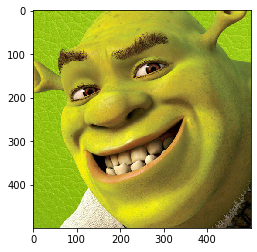

In [6]:
imgplot = plt.imshow(A)

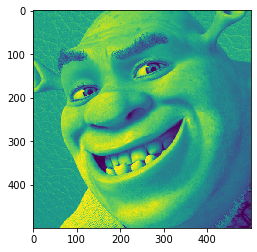

In [7]:
imgplot = plt.imshow(A[:,:,0])

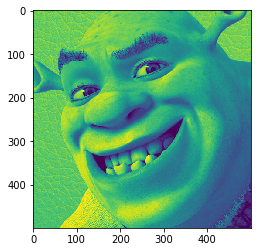

In [8]:
imgplot = plt.imshow(A[:,:,1])

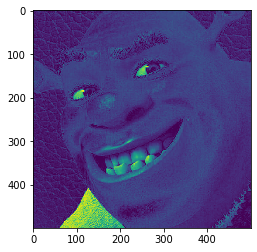

In [9]:
imgplot = plt.imshow(A[:,:,2])

In [10]:
def lower_rank(sigma,accuracy_required):
  total_sum=np.sum(sigma)
  cumilative_sum=0
  sigma_weights=[]

  i=0
  while(i<500):
    cumilative_sum=cumilative_sum+sigma[i]
    accuracy=(cumilative_sum/total_sum)*100
    sigma_weights.append([i,accuracy])
    i=i+1
  sigma_weights=np.array(sigma_weights)
  #.....................................................

  for i in sigma_weights:
    #print(i)
    if(i[1]>accuracy_required):
      return int(i[0]),sigma_weights;
  return int(sigma_weights.shape[0]),sigma_weights

In [11]:
def approximated_using_svd(A,accuracy_required):
  u,sigma,vT=np.linalg.svd(A)
  details=lower_rank(sigma,accuracy_required)
  no_singular_values=details[0]  
  sigma_weights=details[1]
  updated_sigma=np.zeros((500,500))
  updated_sigma[0:no_singular_values,0:no_singular_values]=np.diag(sigma[0:no_singular_values])
  Av=u@updated_sigma@vT
  return Av,no_singular_values,sigma_weights

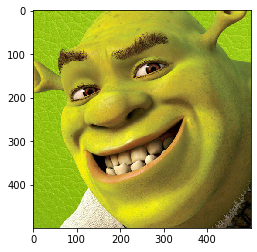

In [12]:
plt.imshow(A)

In [13]:
"""accuracy_required=60
approx_image_details_r=approximated_using_svd(A[:,:,0],accuracy_required)
approx_image_details_g=approximated_using_svd(A[:,:,1],accuracy_required)
approx_image_details_b=approximated_using_svd(A[:,:,2],accuracy_required)
Av=np.zeros((500,500,3))
Av[:,:,0]= approx_image_details_r[0]
Av[:,:,1]=approx_image_details_g[0]
Av[:,:,2]=approx_image_details_b[0]
plt.imshow(Av.astype('uint8'))
print("No_singular values used in R,G,B is:",approx_image_details_r[1],approx_image_details_g[1],approx_image_details_b[1])
print("2-Norm between A and Av for R,G,B respectively")
print(np.linalg.norm((A-Av)[0],2),np.linalg.norm((A-Av)[1],2),np.linalg.norm((A-Av)[2],2))
print("Frobenious-Norm between A and Av for R,G,B respectively")
print(np.linalg.norm((A-Av)[0],'fro'),np.linalg.norm((A-Av)[1],'fro'),np.linalg.norm((A-Av)[2],'fro'))
"""

'accuracy_required=60\napprox_image_details_r=approximated_using_svd(A[:,:,0],accuracy_required)\napprox_image_details_g=approximated_using_svd(A[:,:,1],accuracy_required)\napprox_image_details_b=approximated_using_svd(A[:,:,2],accuracy_required)\nAv=np.zeros((500,500,3))\nAv[:,:,0]= approx_image_details_r[0]\nAv[:,:,1]=approx_image_details_g[0]\nAv[:,:,2]=approx_image_details_b[0]\nplt.imshow(Av.astype(\'uint8\'))\nprint("No_singular values used in R,G,B is:",approx_image_details_r[1],approx_image_details_g[1],approx_image_details_b[1])\nprint("2-Norm between A and Av for R,G,B respectively")\nprint(np.linalg.norm((A-Av)[0],2),np.linalg.norm((A-Av)[1],2),np.linalg.norm((A-Av)[2],2))\nprint("Frobenious-Norm between A and Av for R,G,B respectively")\nprint(np.linalg.norm((A-Av)[0],\'fro\'),np.linalg.norm((A-Av)[1],\'fro\'),np.linalg.norm((A-Av)[2],\'fro\'))\n'

In [20]:
def show_approx_image(A,accuracy_required):
  approx_image_details_r=approximated_using_svd(A[:,:,0],accuracy_required)
  approx_image_details_g=approximated_using_svd(A[:,:,1],accuracy_required)
  approx_image_details_b=approximated_using_svd(A[:,:,2],accuracy_required)
  Av=np.zeros((500,500,3))
  Av[:,:,0]= approx_image_details_r[0]
  Av[:,:,1]=approx_image_details_g[0]
  Av[:,:,2]=approx_image_details_b[0]
  plt.rcParams["figure.figsize"] = (10,10)
  plt.title(str(accuracy_required)+"% approximated image",fontsize=20)
  plt.imshow(Av.astype('uint8'))
  print("No_singular values used in R,G,B is:",approx_image_details_r[1],approx_image_details_g[1],approx_image_details_b[1])
  print("-----------------------------------------------------------------------------------------")
  print("2-Norm between A and Av for R,G,B respectively")
  print(np.linalg.norm((A-Av)[0],2),np.linalg.norm((A-Av)[1],2),np.linalg.norm((A-Av)[2],2))
  print("-----------------------------------------------------------------------------------------")
  print("Frobenious-Norm between A and Av for R,G,B respectively")
  print(np.linalg.norm((A-Av)[0],'fro'),np.linalg.norm((A-Av)[1],'fro'),np.linalg.norm((A-Av)[2],'fro'))

No_singular values used in R,G,B is: 31 29 73
-----------------------------------------------------------------------------------------
2-Norm between A and Av for R,G,B respectively
297.88219766160773 261.99825054236084 254.90714109840164
-----------------------------------------------------------------------------------------
Frobenious-Norm between A and Av for R,G,B respectively
338.2485879616011 302.4347857807529 286.5770436097231


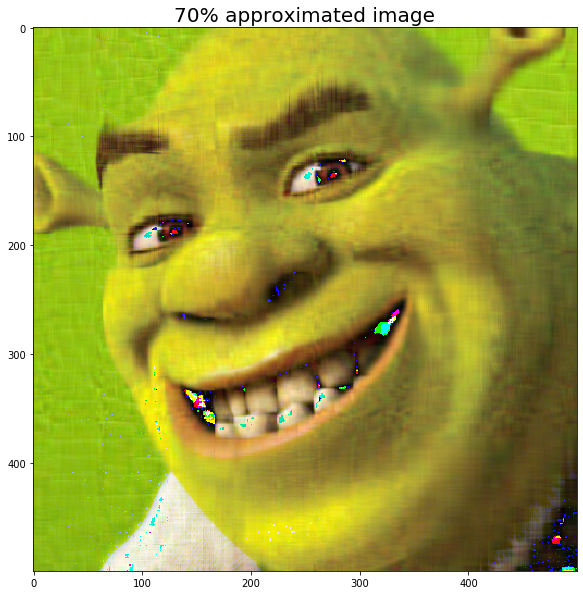

In [21]:
show_approx_image(A,70)

No_singular values used in R,G,B is: 70 68 120
-----------------------------------------------------------------------------------------
2-Norm between A and Av for R,G,B respectively
224.28852236927358 168.4742978868456 163.7550158846797
-----------------------------------------------------------------------------------------
Frobenious-Norm between A and Av for R,G,B respectively
251.2192704894634 191.4310579224594 185.99037189722006


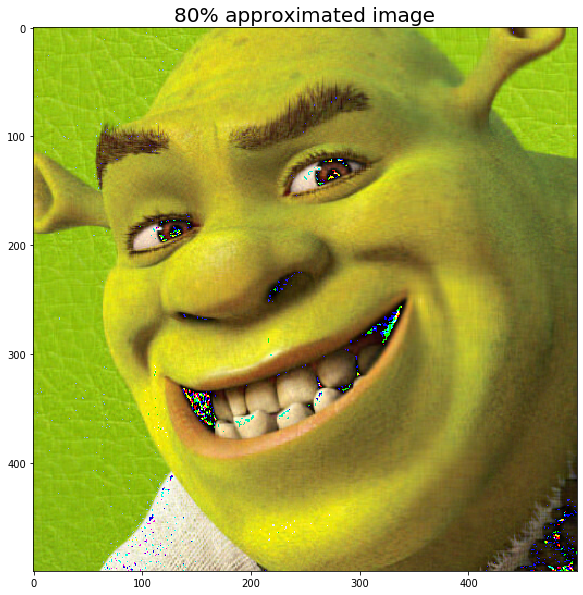

In [22]:
show_approx_image(A,80)

No_singular values used in R,G,B is: 145 143 193
-----------------------------------------------------------------------------------------
2-Norm between A and Av for R,G,B respectively
105.42446439813267 93.91784925694976 84.49047959086492
-----------------------------------------------------------------------------------------
Frobenious-Norm between A and Av for R,G,B respectively
120.74492559294451 105.01029386842978 100.1383629929419


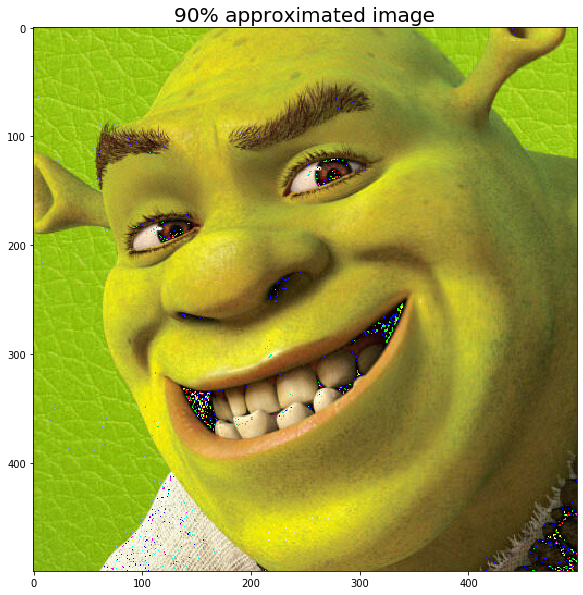

In [23]:
show_approx_image(A,90)

No_singular values used in R,G,B is: 212 211 254
-----------------------------------------------------------------------------------------
2-Norm between A and Av for R,G,B respectively
60.74992104860165 46.38317583729144 48.49832840865042
-----------------------------------------------------------------------------------------
Frobenious-Norm between A and Av for R,G,B respectively
69.68296987843391 54.84095360597341 57.91643028842471


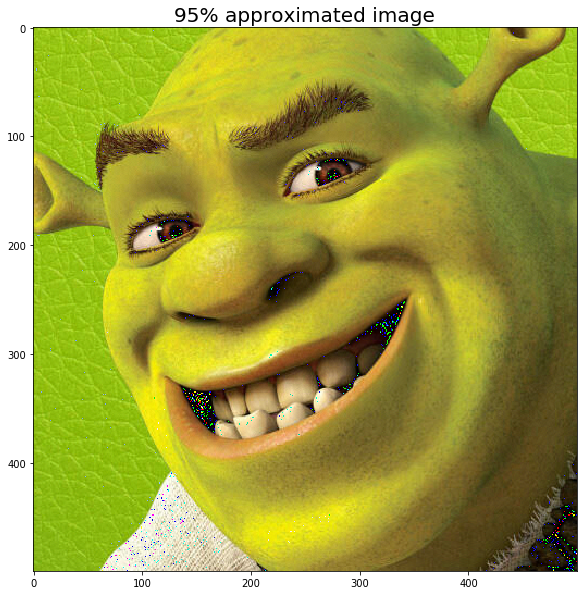

In [24]:
show_approx_image(A,95)

No_singular values used in R,G,B is: 282 281 316
-----------------------------------------------------------------------------------------
2-Norm between A and Av for R,G,B respectively
26.653232637378515 22.822995874822794 24.030525937160014
-----------------------------------------------------------------------------------------
Frobenious-Norm between A and Av for R,G,B respectively
31.07670447643255 27.16419484924479 28.306347552801434


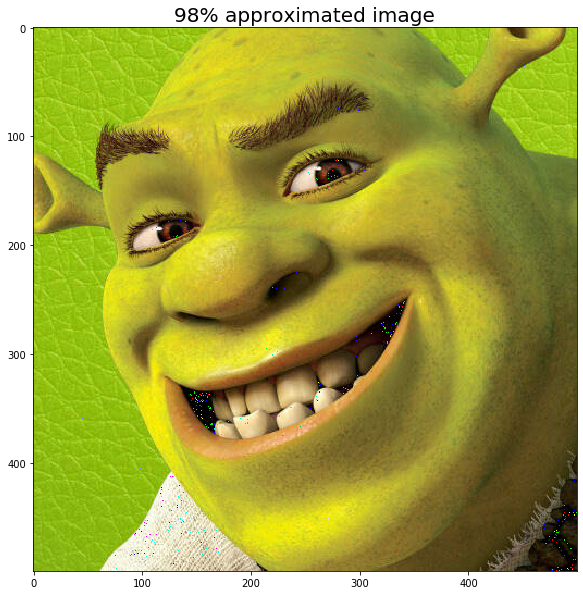

In [25]:
show_approx_image(A,98)

No_singular values used in R,G,B is: 323 322 353
-----------------------------------------------------------------------------------------
2-Norm between A and Av for R,G,B respectively
13.014748762555625 15.636813789537856 14.38852415962509
-----------------------------------------------------------------------------------------
Frobenious-Norm between A and Av for R,G,B respectively
16.095198885863734 18.522671181940563 17.335757822414475


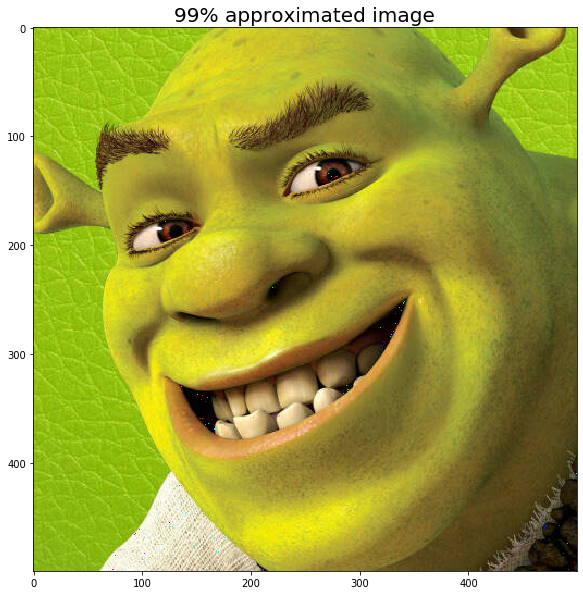

In [26]:
show_approx_image(A,99)